In [465]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from cmath import pi
from cmath import exp
import math
from scipy import stats

In [466]:
def func(file):
    global set1
    set1 = list()
    with open (file) as set_1:
        reader1 = list(csv.reader(set_1))
        set1 = reader1[0]
    for i in range(len(set1)):
        set1[i] = int(set1[i])
    np.random.shuffle(set1)
    set1 = set1[0:1000]
    set1.sort()

    global set1_dict
    set1_dict = dict()
    for i in set1:
        if i in set1_dict.keys():
            set1_dict[i] += 1
        else:
            set1_dict[i] = 1
    print(set1_dict)
    return

In [467]:
def func_for_float(file):
    global set1
    set1 = list()
    with open (file) as set_1:
        reader1 = list(csv.reader(set_1))
        set1 = reader1[0]

    for i in range(len(set1)):
        set1[i] = float(set1[i])

    np.random.shuffle(set1)
    set1 = set1[0:1000]

    set1.sort()
    global set1_dict
    set1_dict = dict()
    for i in set1:
        if i in set1_dict.keys():
            set1_dict[i] += 1
        else:
            set1_dict[i] = 1

In [468]:
global m
def func_1():
    global sum_m
    global m
    global p1_dict
    sum_m= 0
    p1_dict = {}
    for k, v in set1_dict.items():
        p1_dict[k] = v/len(set1)
        sum_m += k*v
    m = sum_m/len(set1)

    global sum_D
    global d
    global q
    sum_D = 0
    for k, v in set1_dict.items():
        sum_D += (k - m)**2*v

    d = sum_D/len(set1)
    q = d**(1/2)
    return

In [511]:
def colmogorov_check(x, p, fun):
        P = {
            0.0: 1.0,
            0.1: 1.0,
            0.2: 1.0,
            0.3: 1.0,
            0.4: 0.997,
            0.5: 0.964,
            0.6: 0.864,
            0.7: 0.711,
            0.8: 0.544,
            0.9: 0.393,
            1.0: 0.270,
            1.1: 0.178,
            1.2: 0.112,
            1.3: 0.068,
            1.4: 0.040,
            1.5: 0.022,
            1.6: 0.012,
            1.7: 0.006,
            1.8: 0.003,
            1.9: 0.002,
            2.0: 0.001,
        }

        n = len(set1)
        x = list(set1_dict.keys())
        D = max([np.abs(emp_f(set1_dict, x[i], n)-fun(x[i])) for i in range(len(x))])

        l = D * (len(x))**(1/2)
        l = round(l,1)


        print('D is ', D)
        print('l is ', l)
        if l > 2:
            return 0
        return P[l]

In [512]:
def emp_f(r_dict,k,n):
    my_sum = 0
    k_list = list(r_dict.keys())
    for i in k_list:
        if (i <= k):
            my_sum += r_dict[i]
        else:
            break
    return my_sum/n

In [471]:
normal_distr = lambda x: 0.5 + 0.5 * math.erf((x-m)/q)

In [472]:
def normal(z):
    f_normal_distr = lambda x: 1 / ((2 * pi)**(1/2) * q) * exp((-1/2) * ((x - m) / q) ** 2)

    y = []
    for i in z:
        y.append(f_normal_distr(i))

    plt.plot(z, y)
    plt.show()

    print(m)
    print(d)
    print(q)

In [473]:
geometric_distr = lambda x: 1 - (1- 1/m)**x

In [474]:
def geom():
    f_geometric_distr = lambda x: geometric_p*(1 - geometric_p)**(x - 1)
    geometric_p = 1/m
    print(1/m)
    x = set1_dict.keys()
    y = []
    for i in x:
        y.append(f_geometric_distr(i))

    plt.plot(x, y)
    plt.show()

In [475]:
def exp_distr(x):
    if x <= 0:
        return 0
    else:
        return 1 - exp(-(1/m)*x)

In [476]:
def exp_f():
    f_exp_distr = lambda x: (1/m)*exp(-(1/m)*x)

    x = []
    for i in set1_dict.keys():
        if i > 0:
            x.append(i)
    y = []
    for i in x:
        y.append(f_exp_distr(i))

    plt.plot(x, y)
    plt.show()

In [477]:
def interval_checking(m, D, n, betta):
    t = {
            0.80: 1.282,
            0.81: 1.310,
            0.82: 1.340,
            0.83: 1.371,
            0.84: 1.404,
            0.85: 1.439,
            0.86: 1.475,
            0.87: 1.513,
            0.88: 1.554,
            0.89: 1.597,
            0.90: 1.643,
            0.91: 1.694,
            0.92: 1.750,
            0.93: 1.810,
            0.94: 1.880,
            0.95: 1.960,
            0.96: 2.053,
            0.97: 2.169,
            0.98: 2.325,
            0.99: 2.576,
            0.9973: 3.000,
            0.999: 3.290,
        }

    sigma = (D/n)**(1/2)
    eps = sigma*t[betta]

    print('m interval is ','[', m-eps,';',m+eps,']')
    sigma_d = ((0.8*n+1.2)/(n*(n-1)))**(1/2)*D
    print('d interval is ','[', D-t[betta]*sigma_d,';',D+t[betta]*sigma_d,']')


set1

In [478]:
func("set_1.csv.txt.xls")

{1: 305, 2: 196, 3: 149, 4: 111, 5: 55, 6: 51, 7: 44, 8: 23, 9: 11, 10: 13, 11: 8, 12: 11, 13: 5, 14: 1, 15: 5, 16: 3, 18: 3, 19: 1, 20: 1, 22: 1, 24: 1, 28: 1, 32: 1}


In [479]:
func_1()

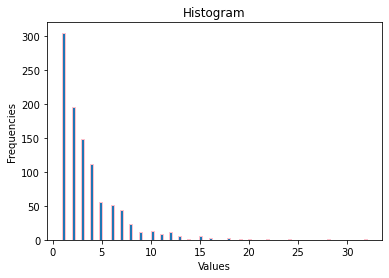

In [480]:
data = set1
plt.hist(data,edgecolor="pink", bins =100)
plt.title("Histogram")
plt.xlabel("Values")
plt.ylabel("Frequencies")
plt.show()

Normal

In [481]:
normal_distr = lambda x: 0.5 + 0.5 * math.erf((x-m)/q)

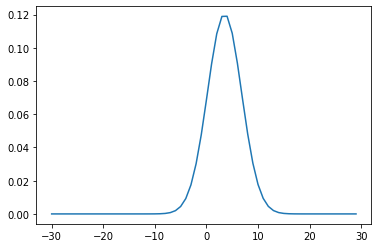

3.511
10.995879000000002
3.3160034680319623


In [482]:
x = range(-30,30,1)
normal(x)

Geometric

In [483]:
##geometric_distr = lambda x: 1 - (1-geometric_p)**x

0.28481913984619767


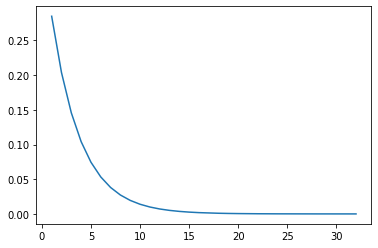

In [484]:
geom()

Exponenta

In [485]:
def exp_distr(x):
    if x <= 0:
        return 0
    else:
        return 1 - exp(-(1/m)*x)

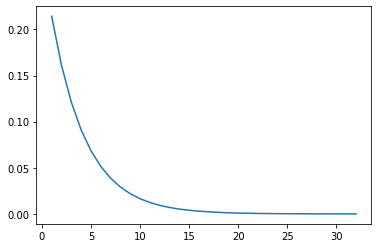

In [486]:
exp_f()

In [487]:
print(colmogorov_check(list(set1_dict.keys()),list(p1_dict.values()),geometric_distr))

D is  0.02261553724003662
l is  0.1
1.0


In [488]:
print(colmogorov_check(list(set1_dict.keys()),list(p1_dict.values()),normal_distr))

D is  0.24134626444859097
l is  1.2
0.112


In [489]:
print(colmogorov_check(list(set1_dict.keys()),list(p1_dict.values()),exp_distr))

D is  0.08105047559764078
l is  0.4
0.997


In [490]:
interval_checking(m,d,1000,0.98)

m interval is  [ 3.2671976242540386 ; 3.7548023757459617 ]
d interval is  [ 10.27187555016275 ; 11.719882449837254 ]


Set2

In [515]:
func_for_float("set_2.csv.txt.xls")

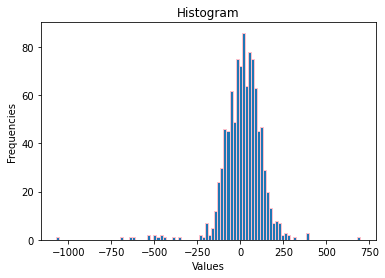

In [516]:
data = set1
plt.hist(data,edgecolor="pink", bins =100)
plt.title("Histogram")
plt.xlabel("Values")
plt.ylabel("Frequencies")
plt.show()

In [493]:
func_1()

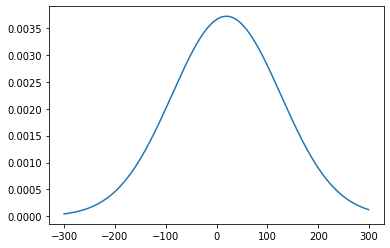

19.25274242100002
11497.136056119272
107.22469890897


In [494]:
x = range(-300,300,1)
normal(x)

0.05194065230464234


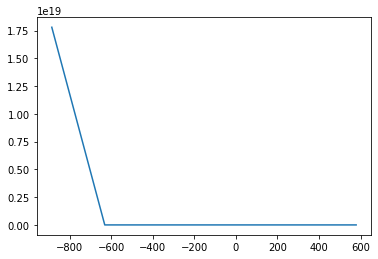

In [495]:
geom()

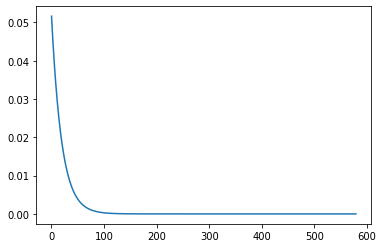

In [496]:
exp_f()

In [497]:
print(colmogorov_check(set1_dict,list(p1_dict.values()),normal_distr))

D is  0.04394734146374024
l is  1.4
0.04


In [498]:
print(colmogorov_check(set1_dict,list(p1_dict.values()),geometric_distr))

D is  3.248224389759887e+20
l is  1.0271787422951758e+22
0


In [499]:
print(colmogorov_check(set1_dict,list(p1_dict.values()),exp_distr))

D is  0.392
l is  12.4
0


In [500]:
interval_checking(m,d,1000,0.98)

m interval is  [ 11.369265644008806 ; 27.13621919799123 ]
d interval is  [ 10740.128256390064 ; 12254.14385584848 ]


Set3

In [517]:
func_for_float("set_3.csv.txt.xls")

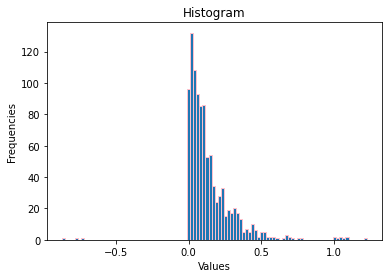

In [518]:
data = set1
plt.hist(data,edgecolor="pink", bins =100)
plt.title("Histogram")
plt.xlabel("Values")
plt.ylabel("Frequencies")
plt.show()

In [503]:
func_1()

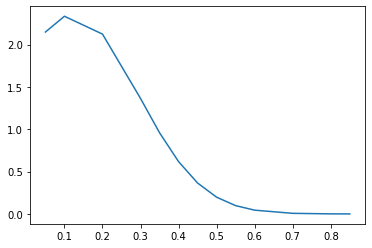

0.12282812700000001
0.028695171124562865
0.16939649088621306


In [504]:
x = [0.05,0.1, 0.2, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.85]
normal(x)

8.141457697225977


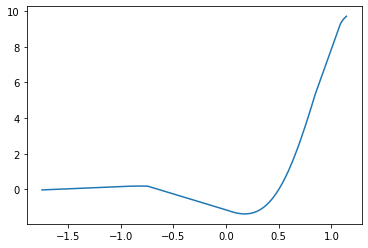

In [505]:
geom()

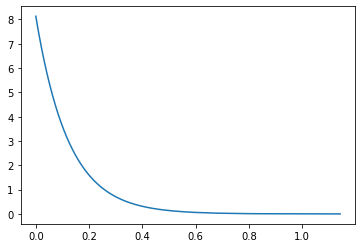

In [506]:
exp_f()

In [507]:
print(colmogorov_check(set1_dict,list(p1_dict.values()),normal_distr))

D is  0.1458368822105503
l is  4.6
0


In [508]:
print(colmogorov_check(set1_dict,list(p1_dict.values()),geometric_distr))

D is  9.448923653106954
l is  298.4
0


In [509]:
print(colmogorov_check(set1_dict,list(p1_dict.values()),exp_distr))

D is  0.018034363809962067
l is  0.6
0.864


In [510]:
interval_checking(m,d,1000,0.98)

m interval is  [ 0.11037359632196099 ; 0.13528265767803904 ]
d interval is  [ 0.026805790303997833 ; 0.030584551945127898 ]
